<a href="https://colab.research.google.com/github/SreeramAdari/Data_Science_Assignmnents/blob/main/Naive_Bayes_%26_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



First 5 rows:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89 

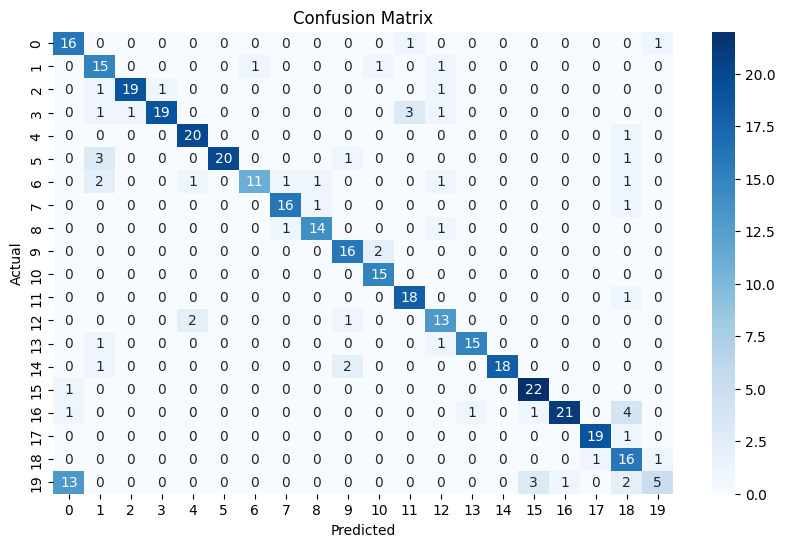


Sentiment Counts:
Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


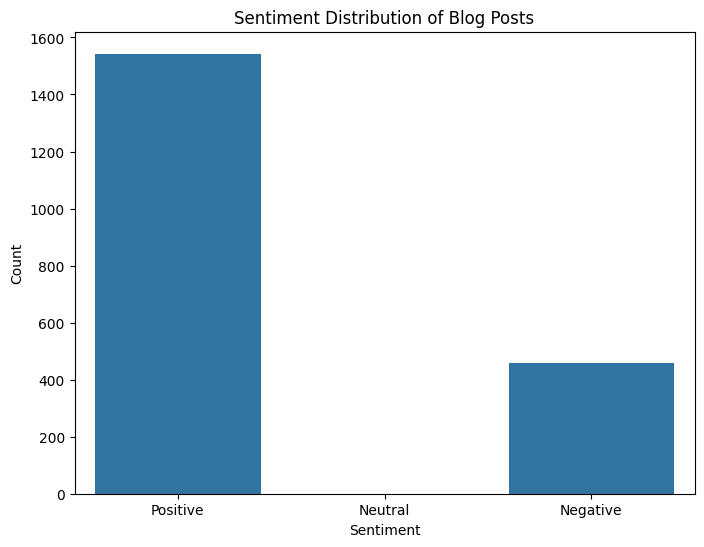

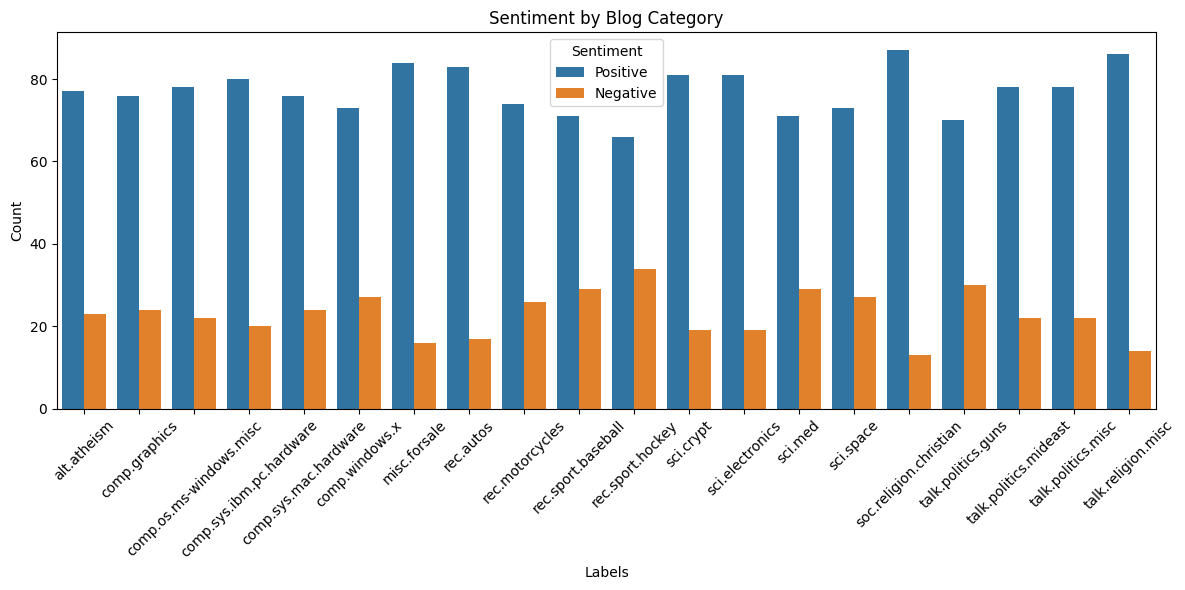

In [ ]:
# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS

# STEP 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')

# STEP 2: Load Dataset
df = pd.read_csv("/content/blogs.csv")
print("\nFirst 5 rows:")
print(df.head())

# STEP 3: Data Preprocessing
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['Clean_Text'] = df['Data'].apply(preprocess_text)

# STEP 4: Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Clean_Text'])
y = df['Labels']

# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# STEP 7: Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# STEP 8: Sentiment Analysis
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Data'].apply(get_sentiment)

# STEP 9: Sentiment Distribution
print("\nSentiment Counts:")
print(df['Sentiment'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Sentiment', order=['Positive','Neutral','Negative'])
plt.title("Sentiment Distribution of Blog Posts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Sentiment across categories
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Labels', hue='Sentiment')
plt.title("Sentiment by Blog Category")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()
